# 04. Model Training

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestCentroid # rocchio classifier
from pprint import pprint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data_path = '../03_feature_engineering/03_pickle/03_data.pickle'
with open(data_path, 'rb') as data_path:
    data = pickle.load(data_path)

features_train_path = '../03_feature_engineering/03_pickle/03_features_train.pickle'
with open(features_train_path, 'rb') as features_train_path:
    features_train = pickle.load(features_train_path)

labels_train_path = '../03_feature_engineering/03_pickle/03_labels_train.pickle'
with open(labels_train_path, 'rb') as labels_train_path:
    labels_train = pickle.load(labels_train_path)

features_test_path = '../03_feature_engineering/03_pickle/03_features_test.pickle'
with open(features_test_path, 'rb') as features_test_path:
    features_test = pickle.load(features_test_path)

labels_test_path = '../03_feature_engineering/03_pickle/03_labels_test.pickle'
with open(labels_test_path, 'rb') as labels_test_path:
    labels_test = pickle.load(labels_test_path)

In [3]:
roc = NearestCentroid()
roc.fit(features_train, labels_train) # training
roc_predict = roc.predict(features_test) # prediction

In [4]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, roc.predict(features_train)))

The training accuracy is: 
0.96


In [5]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, roc_predict))

The test accuracy is: 
0.78


In [6]:
# Classification report
print("Classification report")
print(classification_report(labels_test, roc_predict))

Classification report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.71      1.00      0.83         5
           2       0.67      0.80      0.73         5
           3       1.00      0.80      0.89         5
           4       0.71      0.50      0.59        10
           5       0.62      0.71      0.67         7
           6       0.88      0.78      0.82         9

    accuracy                           0.78        50
   macro avg       0.79      0.80      0.78        50
weighted avg       0.79      0.78      0.77        50



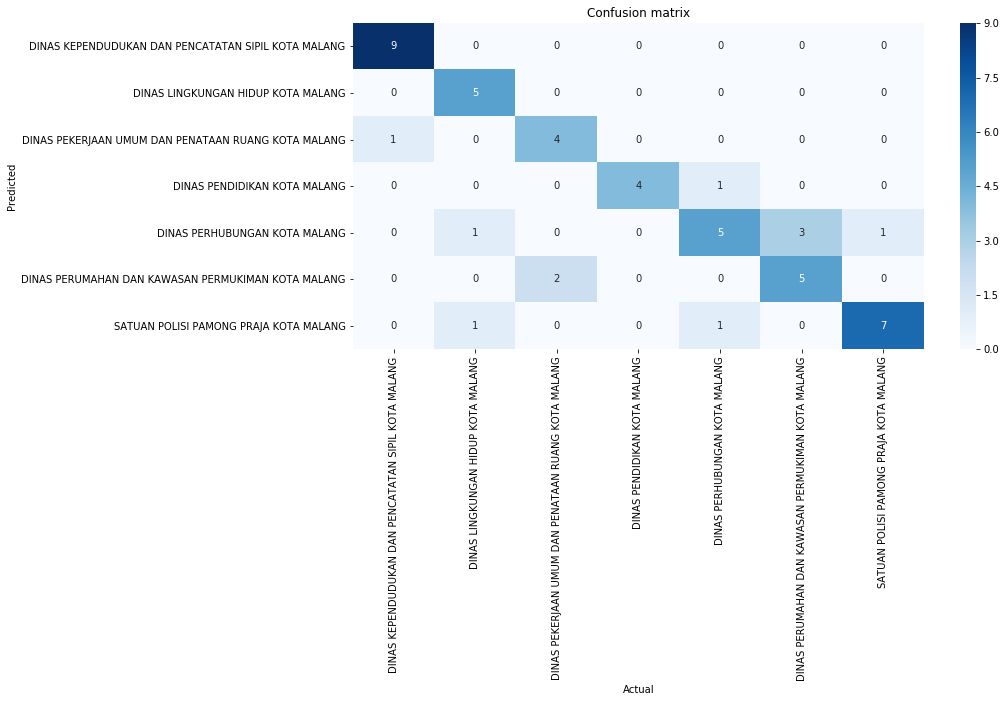

In [7]:
# confusion matrix
aux_df = data[['OPD', 'OPD_label']].drop_duplicates().sort_values('OPD_label')
conf_matrix = confusion_matrix(labels_test, roc_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['OPD'].values, 
            yticklabels=aux_df['OPD'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [8]:
d = {
     'Model': 'Rocchio Classifier',
     'Training Set Accuracy': accuracy_score(labels_train, roc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, roc_predict)
}

model_accuracy = pd.DataFrame(d, index=[0])
model_accuracy

,Model,Training Set Accuracy,Test Set Accuracy
0,Rocchio Classifier,0.96,0.78


In [9]:
with open('04_pickle/04_model_rocchio.pickle', 'wb') as output:
    pickle.dump(roc, output)

with open('04_pickle/04_model_rocchio_accuracy.pickle', 'wb') as output:
    pickle.dump(model_accuracy, output)